In [1]:
addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [6]:
include("jl/all.jl");

In [3]:
x = SharedArray(Float32, 1)
x[:] = 501
y = SharedArray(Float32, 1)
y[:] = 501
z = SharedArray(Float32, 1)
z[:] = 501
m = SharedArray(Float32, 1)
m[:] = ones(Float32, 1)
N = 256
rho=SharedArray(Complex64,(N,N,N))
to_cic!(x,y,z,m, rho, 1, 1000);

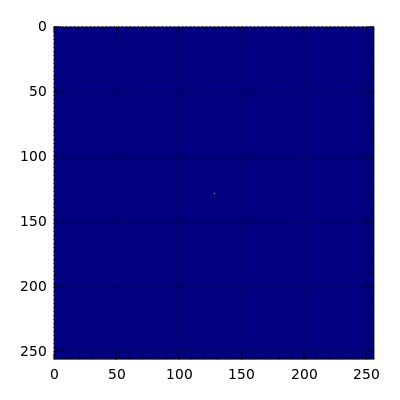

In [4]:
Winston.set_default_plot_size(400,400)
imagesc(real(rho[:,:,129]))
grid(true)

In [7]:
x = SharedArray(Float32, 150000000)
x[:] = rand(Float32, Int(150000000))*999+1;
y = SharedArray(Float32, 150000000)
y[:] = rand(Float32, Int(150000000))*999+1;
z = SharedArray(Float32, 150000000)
z[:] = rand(Float32, Int(150000000))*999+1;
@time c = from_cic!(x,y,z,rho,1,1000);

 10.237683 seconds (13.12 k allocations: 866.529 KB)


  3.508181 seconds (686.93 k allocations: 31.917 MB, 0.16% gc time)


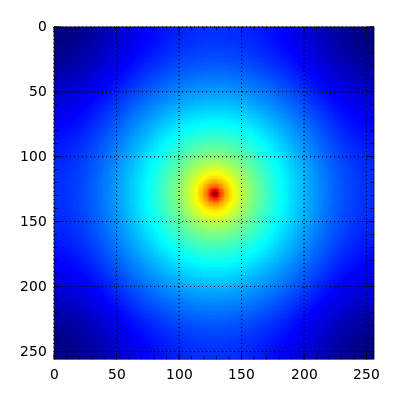

In [8]:
@time g = to_g_fft!(rho, 1000, 3.0)

imagesc(log(abs(g[:,:,129]))*100)
grid(true)

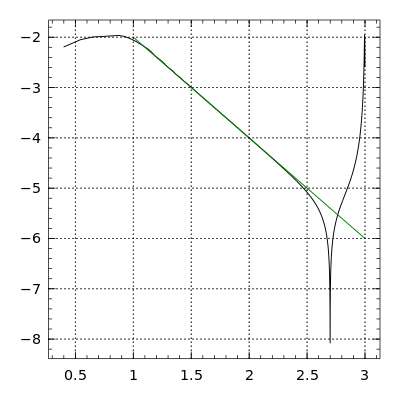

In [9]:
y = SharedArray(Float32, 1000)
y[:] = linspace(503.5,1500,1000)
x = SharedArray(Float32, 1000)
x[:] = ones(1000)*501
z = SharedArray(Float32, 1000)
z[:] = ones(1000)*501

hold(false)
plot(log10(y-501), log10(abs(real(from_cic_dy(x,y,z,g,1,1000)))),"k-")
hold(true)

plot(log10(10:999), -2log10(10:999),"g")
hold(false)
grid(true)

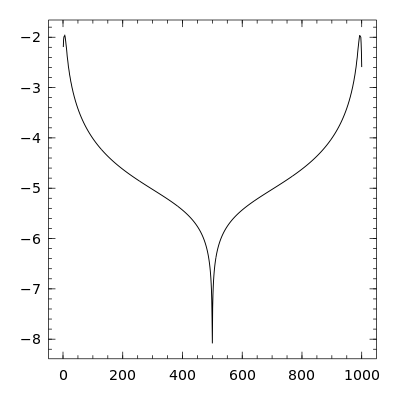

In [10]:
plot(log10(abs(real(from_cic_dy(x,y,z,g,1,1000)))),"k-")

In [11]:
from_cic_dy(x,y,z,g,1,1000)

1000-element SharedArray{Complex{Float32},1}:
 -0.00638734+1.22528e-10im
 -0.00893588+1.30723e-11im
  -0.0101274-3.26795e-11im
  -0.0103766-3.42023e-11im
   -0.0106259-3.5725e-11im
  -0.0108751-3.72478e-11im
   -0.010288-2.63778e-11im
  -0.0092965-9.51677e-12im
 -0.00830508+7.34322e-12im
 -0.00731367+2.42032e-11im
   -0.0064983+2.5345e-11im
 -0.00573905+2.14715e-11im
 -0.00497985+1.75982e-11im
                     ⋮    
   0.0068808+1.68326e-10im
  0.00781311+1.08994e-10im
  0.00880458+3.46288e-11im
  0.00979597-3.97299e-11im
   0.0107874-1.14095e-10im
   0.0107496-1.27385e-10im
   0.0105003-1.28135e-10im
    0.010251-1.28885e-10im
   0.0100018-1.29634e-10im
  0.00765202-6.86482e-12im
  0.00510332+1.27605e-10im
  0.00255491+2.62057e-10im